# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
api_key = os.getenv("QUANDL_API_KEY")
type(api_key)

str

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
current_crypto_asst_amt = 12000
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
btc_url = btc_url + "?format=json"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
eth_url = eth_url + "?format=json"

In [6]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
#print(json.dumps(btc_data, indent=4))
price_btc = btc_data["data"]['1']['quotes']['USD']['price']
print(price_btc)

12909.93


In [7]:
# Fetch current ETH price
# YOUR CODE HERE!]
eth_data = requests.get(eth_url).json()
#print(json.dumps(eth_data, indent=4))
price_eth = eth_data["data"]['1027']['quotes']['USD']['price']
print(price_eth)

408.57


In [8]:
# Compute current value of my crpto
# YOUR CODE HERE!
btc_value = my_btc*price_btc
eth_value = my_eth*price_eth
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $15491.92
The current value of your 5.3 ETH is $2165.42


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#print(f"Alpaca Key type: {type(alpaca_api_key)}")
#print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [11]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-10-22", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                     SPY  \
                             open    high    low   close   volume    open   
2020-10-22 00:00:00-04:00  117.51  117.54  117.3  117.31  3938694  342.96   

                                                             
                             high     low   close    volume  
2020-10-22 00:00:00-04:00  345.24  340.65  344.63  45094573

In [12]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.31
Current SPY closing price: $344.63


In [13]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17231.50
The current value of your 200 AGG shares is $23462.00


### Savings Health Analysis

In [14]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000
# Create savings DataFrame
# YOUR CODE HERE!
amt_crypto = btc_value + eth_value
amt_shares = my_spy_value + my_agg_value

tickers = ["crypto", "shares"]
amt_data = {"amount": [amt_crypto, amt_shares]}

df_savings = pd.DataFrame(amt_data, index=tickers)

# Display savings DataFrame
display(df_savings)

,amount
crypto,17657.337
shares,40693.500


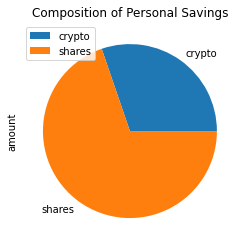

In [15]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")


In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings_total_amt = amt_crypto + amt_shares

# Validate saving health
# YOUR CODE HERE!
if savings_total_amt > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif savings_total_amt == emergency_fund: 
    print("Congratulations! You have reached your financial goal.")
else:
    difference = emergency_fund - savings_total_amt
    print(f"You have ${difference} away from reaching your financial goal")


Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp("2015-10-23", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-10-23", tz="America/New_York").isoformat()

In [18]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
tickers = ["AGG","SPY"]
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high     low   close     volume    open   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0  207.25   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0  207.30   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0  206.20   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0  206.97   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0  208.34   

                                                              
                             high     low   close     volume  
2015-10-23 00:00:00-04:00  207.95  206.30  207.51  103135843  
2015-10-26 00:00:00-04:00  207.37  206.56  206.97   51484043  
2015-10-27 00:00:00-04:00  207.00  205.79  206.58   62899344  
2015-10-28 00:00:00-04:00  208.97  206.21  208.96  115482088  
2015-10-29 00:00:00-04:00  209.27  208.21  208.87   64052955

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [20]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30yr.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001995,1.002171,0.994840,1.009553,0.995913,0.998238,1.011137,1.016524,1.006961,1.013208,...,0.994470,0.987501,0.990797,1.003182,0.995061,1.010498,0.989831,1.008656,1.000887,1.010849
2,0.998871,1.001705,0.998837,0.994501,1.002087,1.006638,1.014168,1.017517,1.003910,1.002608,...,0.997303,0.994626,0.983636,1.003391,0.994173,1.011019,0.984634,0.999440,1.009317,1.011076
3,1.000942,0.993188,1.001648,1.001556,1.008866,0.999826,1.018706,1.024524,1.012583,0.998998,...,0.997125,0.996957,0.980739,1.006183,0.998295,1.023855,0.985847,1.003394,1.013914,1.000921
4,0.998044,0.988399,1.009288,0.998537,1.004968,0.993377,1.033642,1.008155,1.015018,0.993916,...,1.006993,0.999683,0.985471,0.999677,1.004727,1.037715,0.989114,0.993442,1.009593,0.994498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.979849,14.060199,2.464826,6.796596,6.515323,5.395015,7.716677,22.988173,20.349855,6.636628,...,7.397376,5.931359,5.802655,6.806147,2.715581,10.161772,13.078771,15.693468,11.918634,14.043328
7557,9.038170,14.109472,2.469864,6.847269,6.548632,5.374270,7.715929,22.980676,20.344498,6.641000,...,7.445534,5.985247,5.714328,6.732090,2.724440,10.228093,13.020266,15.850796,11.844076,14.190922
7558,8.955801,14.283869,2.439891,6.909569,6.525149,5.327248,7.708485,23.034216,20.559646,6.581789,...,7.450996,5.972629,5.704176,6.738945,2.728233,10.270899,12.983034,16.024123,11.863738,14.098549
7559,9.004570,14.174907,2.462151,6.890187,6.512148,5.323753,7.713797,22.897001,20.506872,6.668212,...,7.402390,5.960125,5.735731,6.783962,2.747384,10.134471,13.049588,16.012314,11.675830,14.229923


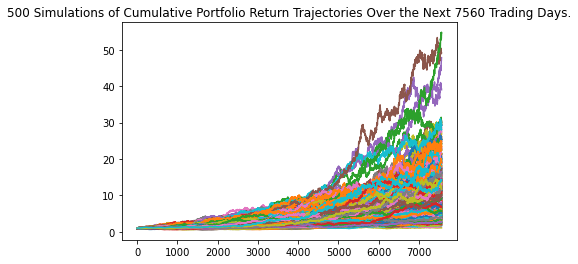

In [22]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30yr.plot_simulation()
line_plot.get_figure().savefig("MC_30yr_sim_plot.png", bbox_inches="tight")

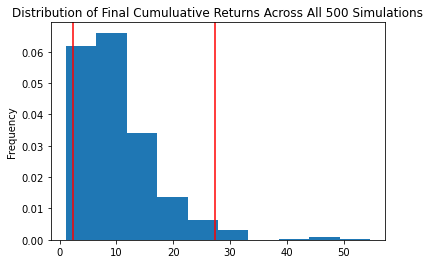

In [23]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_30yr.plot_distribution()
dist_plot.get_figure().savefig('MC_30yr_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_30yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             10.270315
std               6.917629
min               1.090804
25%               5.469498
50%               8.546239
75%              13.221277
max              54.652469
95% CI Lower      2.411546
95% CI Upper     27.382967
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $48230.92 and $547659.33


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $72346.38 and $821489.0


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_5yr.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [28]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_5yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998403,1.001130,1.000742,1.008097,0.997388,0.983560,1.005102,1.005278,1.010273,1.000823,...,0.993643,0.987554,1.001078,0.992882,1.015525,1.008198,1.006081,0.999761,0.993371,0.989272
2,0.986309,0.998657,1.005625,1.004810,0.999019,0.987607,1.004457,1.005013,1.006291,1.011327,...,0.995834,0.989607,1.004658,0.996079,1.021357,1.004153,0.988903,0.997193,0.989845,0.991242
3,0.985839,1.010886,1.006285,1.004176,1.002758,0.990712,1.004109,1.005064,1.006404,1.012150,...,1.015968,0.996754,1.000832,0.989378,1.022360,1.003652,0.975421,1.001850,0.997180,0.987820
4,0.989868,1.011151,1.016129,1.003527,1.016912,0.976597,1.007897,1.004810,1.009076,1.019717,...,1.013031,0.988403,0.989333,0.986142,1.026314,1.012793,0.962404,0.999618,0.988912,1.000968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.633063,2.109919,1.084272,1.552812,1.149532,0.722280,1.591325,1.251053,1.149774,1.339525,...,1.098099,2.059372,1.436277,2.389369,1.660880,1.536840,1.448527,1.480785,1.445062,2.514459
1257,1.627204,2.125141,1.087144,1.561639,1.148769,0.724332,1.581388,1.251226,1.154080,1.349452,...,1.111563,2.071452,1.444465,2.350626,1.657688,1.540940,1.472553,1.487838,1.447379,2.500391
1258,1.627718,2.123658,1.100724,1.559621,1.147195,0.723878,1.586272,1.253895,1.150827,1.348378,...,1.114430,2.070786,1.440241,2.375379,1.671446,1.547493,1.471509,1.481654,1.460800,2.503997
1259,1.610918,2.112565,1.106077,1.556628,1.153519,0.721614,1.589188,1.245787,1.159400,1.344461,...,1.111651,2.080067,1.444025,2.381013,1.695433,1.539438,1.466273,1.492435,1.463107,2.488767


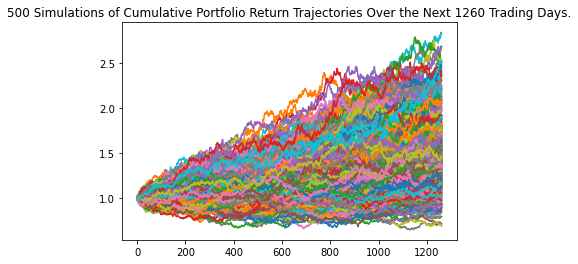

In [29]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_5yr = MC_5yr.plot_simulation()
line_plot_5yr.get_figure().savefig("MC_5yr_sim_plot.png", bbox_inches="tight")

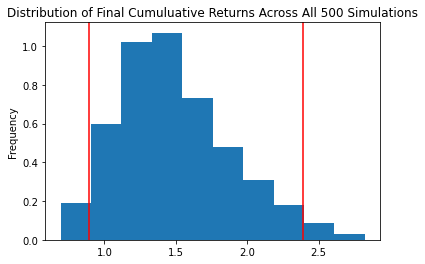

In [30]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_5yr = MC_5yr.plot_distribution()
dist_plot_5yr.get_figure().savefig('MC_5yr_dist_plot.png',bbox_inches='tight')

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5yr = MC_5yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_5yr)

count           500.000000
mean              1.485904
std               0.390076
min               0.692218
25%               1.200240
50%               1.436041
75%               1.717862
max               2.824227
95% CI Lower      0.893928
95% CI Upper      2.388081
Name: 1260, dtype: float64


In [32]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_5yr[8]*initial_investment,2)
ci_upper_five = round(tbl_5yr[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53635.68 and $143284.86


### Ten Years Retirement Option

In [33]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10yr = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_10yr.portfolio_data.head()

AGG                                     \
                             open    high     low   close     volume   
2015-10-23 00:00:00-04:00  109.79  109.79  109.69  109.74  1344632.0   
2015-10-26 00:00:00-04:00  109.85  109.90  109.74  109.79  1385981.0   
2015-10-27 00:00:00-04:00  110.03  110.03  109.88  109.95  1791888.0   
2015-10-28 00:00:00-04:00  109.98  110.05  109.57  109.63  1474796.0   
2015-10-29 00:00:00-04:00  109.34  109.42  109.13  109.16  2095003.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-10-23 00:00:00-04:00          NaN  207.25  207.95  206.30  207.51   
2015-10-26 00:00:00-04:00     0.000456  207.30  207.37  206.56  206.97   
2015-10-27 00:00:00-04:00     0.001457  206.20  207.00  205.79  206.58   
2015-10-28 00:00:00-04:00    -0.002910  206.97  208.97  206.21  208.96   
2015-10-29 00:00:00-04:00    -0.004287  208.34  209.27  208.21  208.87   

                                                   
                              volume daily_return  
2015-10-23 00:00:00-04:00  103135843          NaN  
2015-10-26 00:00:00-04:00   51484043    -0.002602  
2015-10-27 00:00:00-04:00   62899344    -0.001884  
2015-10-28 00:00:00-04:00  115482088     0.011521  
2015-10-29 00:00:00-04:00   64052955    -0.000431

In [34]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10yr.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.016360,1.004495,0.994520,1.006422,0.994046,0.999259,0.994200,1.008469,0.998394,0.996136,...,0.985784,1.002106,1.002944,1.004146,0.996609,0.997457,1.003038,1.004442,0.997791,0.997752
2,1.023146,1.013547,1.001187,1.010575,0.991477,0.991570,0.994217,0.992975,0.999072,1.005575,...,0.975368,0.995760,1.011316,1.004867,0.993182,1.000301,1.008776,1.003786,1.011960,1.007057
3,1.035030,1.014178,0.996622,1.018185,0.988126,0.988171,0.987671,0.995251,1.023485,1.012625,...,0.957449,0.993577,1.012407,1.006741,0.991468,1.001643,1.011790,0.998980,1.014241,1.006641
4,1.042541,1.026507,1.000481,1.013099,0.984088,0.983684,0.987881,0.997953,1.024193,1.023084,...,0.963781,0.989845,1.007120,0.994752,0.986529,0.996675,0.993816,1.003516,1.024139,1.008678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.682556,1.919755,2.419980,2.869197,2.443028,1.911759,1.894195,2.350958,1.961712,3.192008,...,2.058456,1.013052,1.780422,2.046625,3.065101,1.870073,2.186681,2.067828,4.970749,1.916851
2517,1.682367,1.906516,2.429303,2.857581,2.421647,1.919653,1.875995,2.344746,1.954892,3.139510,...,2.050121,1.016012,1.775007,2.054401,3.055418,1.885686,2.164353,2.089878,5.007624,1.918366
2518,1.670996,1.896721,2.448523,2.846269,2.415037,1.898992,1.909356,2.390663,1.946473,3.169900,...,2.061148,1.014362,1.772369,2.053251,3.038619,1.875060,2.152427,2.111560,5.030359,1.912966
2519,1.683676,1.893020,2.448214,2.827236,2.430569,1.901367,1.910015,2.376846,1.924203,3.110721,...,2.078785,1.016297,1.758918,2.078712,3.035397,1.867399,2.169093,2.123366,5.085126,1.922305


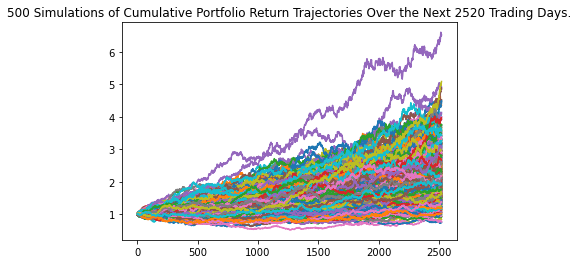

In [35]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10yr = MC_10yr.plot_simulation()
line_plot_10yr.get_figure().savefig("MC_10yr_sim_plot.png", bbox_inches="tight")

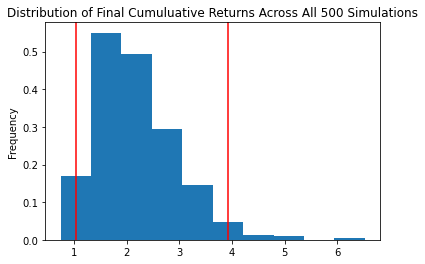

In [36]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_10yr = MC_10yr.plot_distribution()
dist_plot_10yr.get_figure().savefig('MC_10yr_dist_plot.png',bbox_inches='tight')

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10yr = MC_10yr.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl_10yr)

count           500.000000
mean              2.165656
std               0.765501
min               0.744706
25%               1.623653
50%               2.024504
75%               2.571501
max               6.524831
95% CI Lower      1.036373
95% CI Upper      3.929214
Name: 2520, dtype: float64


In [38]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_10yr[8]*initial_investment,2)
ci_upper_ten = round(tbl_10yr[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62182.39 and $235752.86
